In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
test_data=pd.read_csv(r'E:\Dataset\realtime project\test.csv',sep=',')

In [3]:
test_data.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
test_data.isnull().any()

Store        False
Dept         False
Date         False
IsHoliday    False
dtype: bool

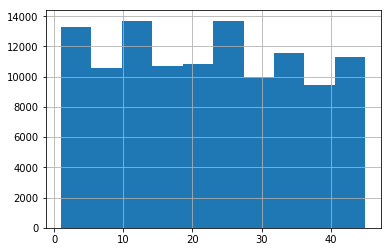

In [5]:
test_data['Store'].hist()

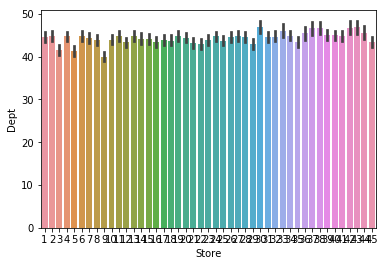

In [6]:
sns.barplot(x="Store",y="Dept", data=test_data)

In [7]:
train_data=pd.read_csv(r'E:\Dataset\realtime project\train.csv',sep=',')

In [8]:
train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train_data.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
dtype: bool

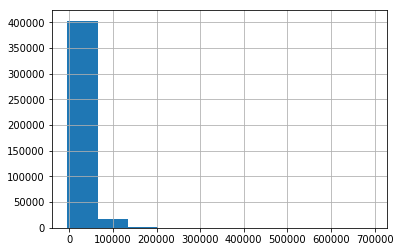

In [10]:
train_data['Weekly_Sales'].hist()

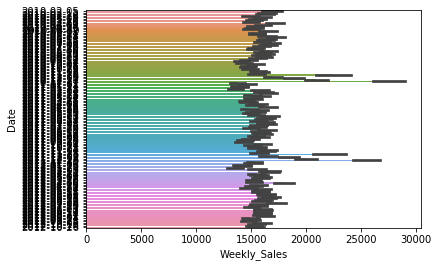

In [11]:
sns.barplot(x="Weekly_Sales",y="Date", data=train_data)

In [13]:
Stores_data=pd.read_csv(r'E:\Dataset\realtime project\Stores.csv',sep=',')

In [14]:
Stores_data.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
Stores_data.isnull().any()

Store    False
Type     False
Size     False
dtype: bool

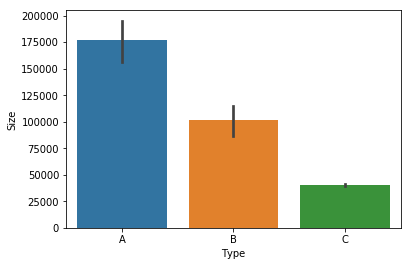

In [16]:
sns.barplot(x="Type",y="Size", data=Stores_data)

In [17]:
sample_Submission=pd.read_csv(r'E:\Dataset\realtime project\sampleSubmission.csv',sep=',')

In [18]:
sample_Submission.head(5)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [20]:
sample_Submission.isnull().any()

Id              False
Weekly_Sales    False
dtype: bool

In [21]:
features_data=pd.read_csv(r'E:\Dataset\realtime project\features.csv',sep=',')

In [22]:
features_data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
features_data.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
dtype: bool

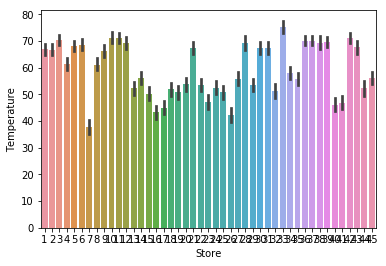

In [24]:
sns.barplot(x="Store",y="Temperature", data=features_data)

In [17]:
t = train_data.merge(features_data, on = 'Store', how = 'inner')

In [18]:
t.head(5)

,Store,Dept,Date_x,Weekly_Sales,IsHoliday_x,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.5,False,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-05,24924.5,False,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-05,24924.5,False,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-05,24924.5,False,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-02-05,24924.5,False,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
t['MarkDown1'].fillna(t['MarkDown1'].mean(), inplace = True)
t['MarkDown1'].head()

0    7457.849676
1    7457.849676
2    7457.849676
3    7457.849676
4    7457.849676
Name: MarkDown1, dtype: float64

In [23]:
t['MarkDown2'].fillna(t['MarkDown2'].mean(), inplace = True)
t['MarkDown2'].head()

0    3500.416782
1    3500.416782
2    3500.416782
3    3500.416782
4    3500.416782
Name: MarkDown2, dtype: float64

In [24]:
t['MarkDown3'].fillna(t['MarkDown3'].mean(), inplace = True)
t['MarkDown3'].head(5)

0    1839.121426
1    1839.121426
2    1839.121426
3    1839.121426
4    1839.121426
Name: MarkDown3, dtype: float64

In [25]:
t['MarkDown4'].fillna(t['MarkDown4'].mean(), inplace = True)
t['MarkDown4'].head(5)

0    3374.053308
1    3374.053308
2    3374.053308
3    3374.053308
4    3374.053308
Name: MarkDown4, dtype: float64

In [26]:
t['MarkDown5'].fillna(t['MarkDown5'].mean(), inplace = True)
t['MarkDown5'].head(5)

0    4328.90484
1    4328.90484
2    4328.90484
3    4328.90484
4    4328.90484
Name: MarkDown5, dtype: float64

In [27]:
t['Unemployment'].fillna(t['Unemployment'].mean(), inplace = True)
t['Unemployment'].head(5)

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
Name: Unemployment, dtype: float64

In [28]:
t['CPI'].fillna(t['CPI'].mean(), inplace = True)
t['CPI'].head(5)

0    211.096358
1    211.242170
2    211.289143
3    211.319643
4    211.350143
Name: CPI, dtype: float64

In [20]:
train_data['Date1'] = pd.to_datetime(train_data['Date'])
train_data['Date1']=train_data['Date1'].map(dt.datetime.toordinal)

In [21]:
del train_data['Date']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['Weekly_Sales', 'Date1'],axis=1), 
                                                    train_data['Weekly_Sales'], test_size=0.20, 
                                                    random_state=8)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

2.8722619045669417 %
